# ONS Boundaries

Fragments associated with grabbing boundaries data.

## Wards (December 2018) Full Extent Boundaries GB
http://geoportal.statistics.gov.uk/datasets/wards-december-2018-full-extent-boundaries-gb

In [2]:
!wget https://opendata.arcgis.com/datasets/52182cdda64d4b15984f6446ca7ee7fd_1.zip?outSR=%7B%22wkid%22%3A27700%2C%22latestWkid%22%3A27700%7D -O wards_fullextent.zip

--2019-03-06 14:06:04--  https://opendata.arcgis.com/datasets/52182cdda64d4b15984f6446ca7ee7fd_1.zip?outSR=%7B%22wkid%22%3A27700%2C%22latestWkid%22%3A27700%7D
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.197.13.10, 52.7.213.26
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.197.13.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘wards_fullextent.zip’

wards_fullextent.zi     [           <=>      ]  88.51M  39.0MB/s    in 2.3s    

2019-03-06 14:06:07 (39.0 MB/s) - ‘wards_fullextent.zip’ saved [92814270]



In [3]:
!unzip wards_fullextent.zip

Archive:  wards_fullextent.zip
  inflating: Wards_December_2018_Full_Extent_Boundaries_GB.shp  
  inflating: Wards_December_2018_Full_Extent_Boundaries_GB.shx  
 extracting: Wards_December_2018_Full_Extent_Boundaries_GB.cpg  
  inflating: Wards_December_2018_Full_Extent_Boundaries_GB.prj  
  inflating: Wards_December_2018_Full_Extent_Boundaries_GB.xml  
  inflating: Wards_December_2018_Full_Extent_Boundaries_GB.dbf  


In [20]:
! spatialite adminboundaries.db ".loadshp ./Wards_December_2018_Full_Extent_Boundaries_GB wardboundaries UTF-8 27700"

SpatiaLite version ..: 4.3.0a	Supported Extensions:
	- 'VirtualShape'	[direct Shapefile access]
	- 'VirtualDbf'		[direct DBF access]
	- 'VirtualXL'		[direct XLS access]
	- 'VirtualText'		[direct CSV/TXT access]
	- 'VirtualNetwork'	[Dijkstra shortest path]
	- 'RTree'		[Spatial Index - R*Tree]
	- 'MbrCache'		[Spatial Index - MBR cache]
	- 'VirtualSpatialIndex'	[R*Tree metahandler]
	- 'VirtualElementary'	[ElemGeoms metahandler]
	- 'VirtualXPath'	[XML Path Language - XPath]
	- 'VirtualFDO'		[FDO-OGR interoperability]
	- 'VirtualGPKG'	[OGC GeoPackage interoperability]
	- 'VirtualBBox'		[BoundingBox tables]
	- 'SpatiaLite'		[Spatial SQL - OGC]
PROJ.4 version ......: Rel. 4.9.3, 15 August 2016
GEOS version ........: 3.6.2-CAPI-1.10.2 4d2925d6
TARGET CPU ..........: x86_64-linux-gnu
the SPATIAL_REF_SYS table already contains some row(s)
Loading shapefile at './Wards_December_2018_Full_Extent_Boundaries_GB' into SQLite table 'wardboundaries'

BEGIN;
CREATE TABLE "wardboundaries" (
"PK_UID" INTE

In [21]:
! spatialite adminboundaries.db "SELECT CreateSpatialIndex('wardboundaries', 'Geometry');"

SpatiaLite version ..: 4.3.0a	Supported Extensions:
	- 'VirtualShape'	[direct Shapefile access]
	- 'VirtualDbf'		[direct DBF access]
	- 'VirtualXL'		[direct XLS access]
	- 'VirtualText'		[direct CSV/TXT access]
	- 'VirtualNetwork'	[Dijkstra shortest path]
	- 'RTree'		[Spatial Index - R*Tree]
	- 'MbrCache'		[Spatial Index - MBR cache]
	- 'VirtualSpatialIndex'	[R*Tree metahandler]
	- 'VirtualElementary'	[ElemGeoms metahandler]
	- 'VirtualXPath'	[XML Path Language - XPath]
	- 'VirtualFDO'		[FDO-OGR interoperability]
	- 'VirtualGPKG'	[OGC GeoPackage interoperability]
	- 'VirtualBBox'		[BoundingBox tables]
	- 'SpatiaLite'		[Spatial SQL - OGC]
PROJ.4 version ......: Rel. 4.9.3, 15 August 2016
GEOS version ........: 3.6.2-CAPI-1.10.2 4d2925d6
TARGET CPU ..........: x86_64-linux-gnu
1


## Spatialite Read Demo

Example of how to read data from Spatialite database.

In [22]:
#Set up the db connection and load in the spatialite extension
import sqlite3

#!whereis mod_spatialite.so
shared_lib = '/usr/lib/x86_64-linux-gnu/mod_spatialite.so'
dbpath = 'adminboundaries.db' 

# Create connection and load spatialite extension
conn = sqlite3.connect(dbpath)

# Enable SpatialLite extension
conn.enable_load_extension(True)
conn.load_extension(shared_lib)

# Initialise spatial table support
conn.execute('SELECT InitSpatialMetadata(1)')

In [52]:
#We can make a simple pandas query
pd.read_sql('SELECT * FROM wardboundaries LIMIT 3', conn)

,PK_UID,objectid,wd18cd,wd18nm,wd18nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,Geometry
0,1,1,E05000026,Abbey,,544434,184378,0.081291,51.539822,1.282925e+06,6244.885015,b'\x00\x014l\x00\x000\x99*\x98r\x95 A@\xb1\xbf...
1,2,2,E05000027,Alibon,,549247,185196,0.150987,51.545921,1.364442e+06,6353.917640,b'\x00\x014l\x00\x00X\xb1\xbf\xcc\xb8\xb8 A\x0...
2,3,3,E05000028,Becontree,,546863,185869,0.116912,51.552601,1.288082e+06,6341.645817,b'\x00\x014l\x00\x00\x90~\xfb\x9a\x9c\xaa A\xc...


More usefully, we can read queries into a geopandas dataframe if we make sure we return a specified geometry column:

In [40]:
import geopandas as gpd
%matplotlib inline

In [36]:
# SQL must wrap the geometry in hex(st_asbinary(...))
sql = "SELECT wd18nm, Hex(ST_AsBinary(Geometry)) AS Geometry FROM wardboundaries LIMIT 2;"
gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='Geometry').head()

,wd18nm,Geometry
0,Abbey,(POLYGON ((544735.1960000005 184076.4979999997...
1,Alibon,(POLYGON ((547932.3998999996 184916.5975000001...


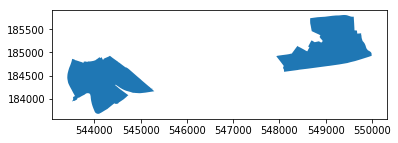

In [42]:
gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='Geometry').plot();

In [44]:
#Select ward by name - we need to make sure we return a geometry column from the geopandas dataframe
sql = "SELECT wd18nm, Hex(ST_AsBinary(Geometry)) AS Geometry FROM wardboundaries WHERE wd18nm='Arreton and Newchurch';"
gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='Geometry')


,wd18nm,Geometry
0,Arreton and Newchurch,(POLYGON ((452228.4961999999 83628.70079999976...


We can select neighbouring wards too:

In [60]:
q='''
SELECT w1.wd18nm AS "Ward",
  w2.wd18nm AS "Neighbour", Hex(ST_AsBinary(w2.Geometry)) AS Geometry 
FROM wardboundaries AS w1,
  wardboundaries AS w2
WHERE (Touches(w1.Geometry, w2.Geometry) OR w1.wd18nm=w2.wd18nm)
AND w1.wd18nm='Arreton and Newchurch';
'''

gpd.GeoDataFrame.from_postgis(q, conn, geom_col='Geometry')

,Ward,Neighbour,Geometry
0,Arreton and Newchurch,Arreton and Newchurch,(POLYGON ((452228.4961999999 83628.70079999976...
1,Arreton and Newchurch,"Brading, St Helens and Bembridge",(POLYGON ((463590.1529999999 90525.79900000058...
2,Arreton and Newchurch,Central Wight,(POLYGON ((448688.1989000002 86183.19959999993...
3,Arreton and Newchurch,Godshill and Wroxall,(POLYGON ((453855.7002999997 78615.09600000083...
4,Arreton and Newchurch,"Havenstreet, Ashey and Haylands",(POLYGON ((453283.6990999999 87799.39699999988...
5,Arreton and Newchurch,Lake North,(POLYGON ((458851.6961000003 84974.19569999911...
6,Arreton and Newchurch,Lake South,(POLYGON ((458190.9039000003 83607.99679999985...
7,Arreton and Newchurch,Newport East,(POLYGON ((450126.4013999999 88779.29649999924...
8,Arreton and Newchurch,Newport North,(POLYGON ((453283.6990999999 87799.39699999988...
9,Arreton and Newchurch,Newport South,(POLYGON ((450438.1966000004 87920.80220000073...


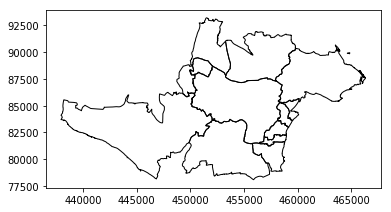

In [62]:
gpd.GeoDataFrame.from_postgis(q, conn, geom_col='Geometry').plot(facecolor="none", edgecolor='black',);